<a href="https://colab.research.google.com/github/LuisaVALvarezS/CoderLab/blob/main/Visualizaci%C3%B3n_Luisa_%C3%81lvarez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [293]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime
import numpy as np

In [294]:
mpl.style.use('bmh')

In [295]:
df = pd.read_excel('https://raw.githubusercontent.com/LuisaVALvarezS/CoderLab/main/VentasMoriche.xls')

In [296]:
df.head()

,Recibo N°,Codigo,Descripcion,Fecha,Hora,Precio,Cant,Importe,Util,FP,Cliente,Rubro,Marca,Proveedor
0,1,0036,QUESO GOUDA VERONICA,2022/04/25,09:52,2056.0,0.495,1017.720,407.1375,E,Consumidor Final,FIAMBRERIA,VERONICA,BANYLAC
1,2,7793281493045,HAMBURGUESA UNION GANADERA X2,2022/04/25,09:57,175.0,6.000,1050.000,420.0000,E,Consumidor Final,FRESCOS,UNIÓN GANADERA,BANYLAC
2,3,0022,QUESO BARRA PUNTA DEL AGUA,2022/04/25,10:01,1250.0,0.210,262.500,105.0000,E,Consumidor Final,FIAMBRERIA,PUNTA DEL AGUA,BANYLAC
3,4,0050,MORTADELA SELLO DE PLATA,2022/04/25,10:08,660.0,0.200,132.000,52.8360,E,Consumidor Final,FIAMBRERIA,SELLO DE PLATA,BANYLAC
4,4,0042,PALETA SELLO DE PLATA,2022/04/25,10:08,955.0,0.195,186.225,74.5017,E,Consumidor Final,FIAMBRERIA,SELLO DE PLATA,BANYLAC


In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51725 entries, 0 to 51724
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Recibo N°    51725 non-null  int64  
 1   Codigo       51725 non-null  object 
 2   Descripcion  51725 non-null  object 
 3   Fecha        51725 non-null  object 
 4   Hora         51725 non-null  object 
 5   Precio       51725 non-null  float64
 6   Cant         51725 non-null  float64
 7   Importe      51725 non-null  float64
 8   Util         51725 non-null  float64
 9   FP           51724 non-null  object 
 10  Cliente      51725 non-null  object 
 11  Rubro        51723 non-null  object 
 12  Marca        47851 non-null  object 
 13  Proveedor    50838 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 5.5+ MB


In [298]:
from numpy import datetime64
df['Fecha'] = pd.to_datetime(df['Fecha'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51725 entries, 0 to 51724
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Recibo N°    51725 non-null  int64         
 1   Codigo       51725 non-null  object        
 2   Descripcion  51725 non-null  object        
 3   Fecha        51725 non-null  datetime64[ns]
 4   Hora         51725 non-null  object        
 5   Precio       51725 non-null  float64       
 6   Cant         51725 non-null  float64       
 7   Importe      51725 non-null  float64       
 8   Util         51725 non-null  float64       
 9   FP           51724 non-null  object        
 10  Cliente      51725 non-null  object        
 11  Rubro        51723 non-null  object        
 12  Marca        47851 non-null  object        
 13  Proveedor    50838 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(8)
memory usage: 5.5+ MB


In [299]:
venta_mes = df.groupby(df.Fecha.dt.month)['Cant','Importe','Util'].sum()
venta_mes

<ipython-input-299-aee51394f057>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  venta_mes = df.groupby(df.Fecha.dt.month)['Cant','Importe','Util'].sum()


,Cant,Importe,Util
Fecha,,,
1,98201.8200,1.153420e+06,354688.460911
2,91336.2500,1.561188e+06,520782.207889
3,185193.0290,2.180283e+06,-331586.894401
4,62914.4050,8.564971e+05,266162.855479
5,4301.1015,5.466832e+05,189031.017779
6,14487.2560,5.455023e+05,206986.698415
7,23894.3805,7.878727e+05,297405.978151
8,14223.0350,8.776043e+05,272247.950509
9,15283.8555,1.011968e+06,319006.045686


Text(0.5, 0, 'Mes')

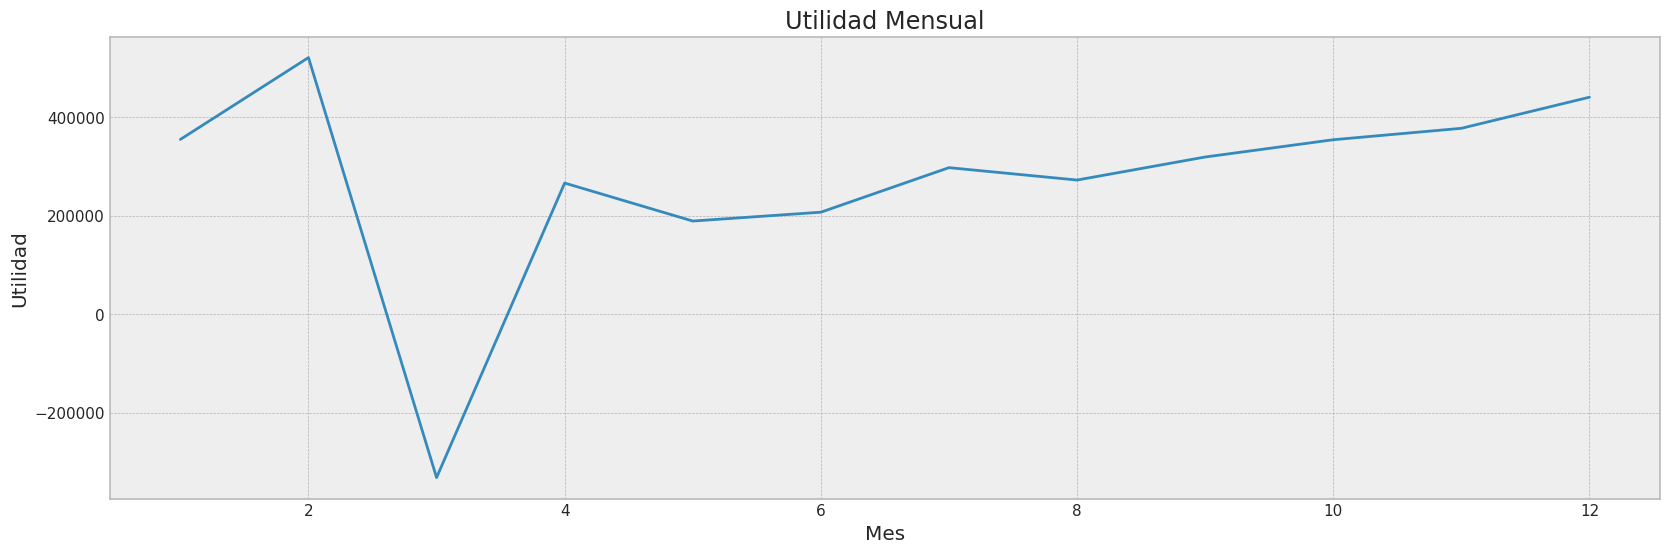

In [300]:
fig, ax = plt.subplots(figsize=(20, 6), dpi=100)

x1 = venta_mes.index
y1 = venta_mes['Util']

ax.plot(x1, y1)

ax.set_title('Utilidad Mensual')
ax.set_ylabel('Utilidad')
ax.set_xlabel('Mes')

In [301]:
df.rename(columns = {'Recibo N°':'Recibo'}, inplace = True)
df.index = df['Recibo']
df_rubro = df.groupby('Rubro')['Cant','Importe','Util','FP'].sum().head(15)
df_rubro

<ipython-input-301-af1136d159d5>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_rubro = df.groupby('Rubro')['Cant','Importe','Util','FP'].sum().head(15)
<ipython-input-301-af1136d159d5>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_rubro = df.groupby('Rubro')['Cant','Importe','Util','FP'].sum().head(15)


,Cant,Importe,Util
Rubro,,,
-Sin Categoria-,902.0000,2.459378e+05,244829.900000
- SIN CLASIFICAR -,56.0000,1.330597e+04,5173.780000
ALMACEN,6905.6150,1.499895e+06,443845.128020
BALANCEADOS,147.0000,5.966494e+04,15516.312995
BAZAR,3.0000,2.910000e+03,1230.000000
BEBIDAS,11683.0000,2.378136e+06,812163.425640
BODEGA,2910.0000,9.034588e+05,315709.957000
CIGARRILLOS,5499.0000,1.768489e+06,391532.927975
FIAMBRERIA,2846.6715,1.901135e+06,-336130.734343


In [302]:
df_rubro.info()
df_rubro.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries,  -Sin Categoria-  to PERFUMERIA
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Cant     15 non-null     float64
 1   Importe  15 non-null     float64
 2   Util     15 non-null     float64
dtypes: float64(3)
memory usage: 480.0+ bytes


,Cant,Importe,Util
count,15.000000,1.500000e+01,15.000000
mean,38618.219100,7.684619e+05,187489.411750
std,96518.422668,8.676571e+05,306736.411752
min,3.000000,2.565420e+03,-336130.734343
25%,322.000000,8.526565e+04,10345.046497
50%,1196.000000,2.459378e+05,43423.820000
75%,6202.307500,1.634192e+06,353621.442488
max,314733.000000,2.378136e+06,812163.425640


Text(0.5, 0, 'Rubro')

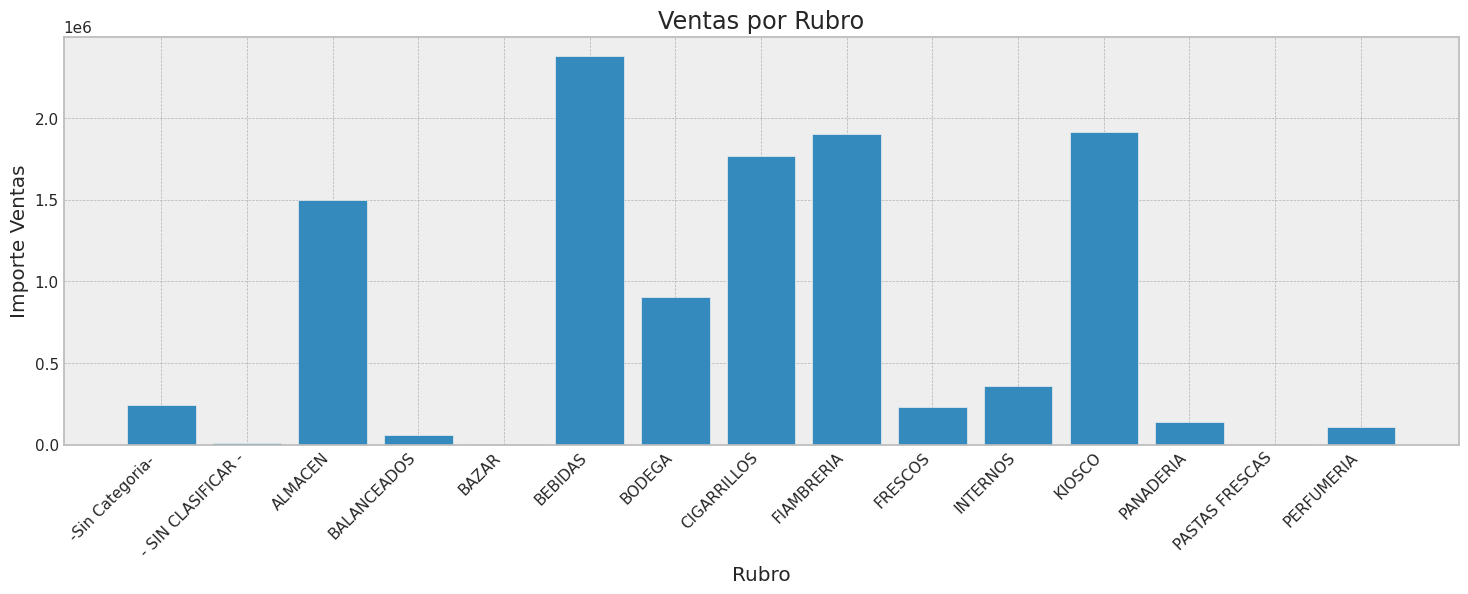

In [303]:
fig, ax = plt.subplots(figsize=(18, 6), dpi=100)

x = df_rubro.index
y = df_rubro['Importe']

ax.bar(x, y)
fig.autofmt_xdate(rotation=45)
ax.set_title('Ventas por Rubro')
ax.set_ylabel('Importe Ventas')
ax.set_xlabel('Rubro')

Text(0.5, 1.0, 'Top 5 Rubros más Vendidos')

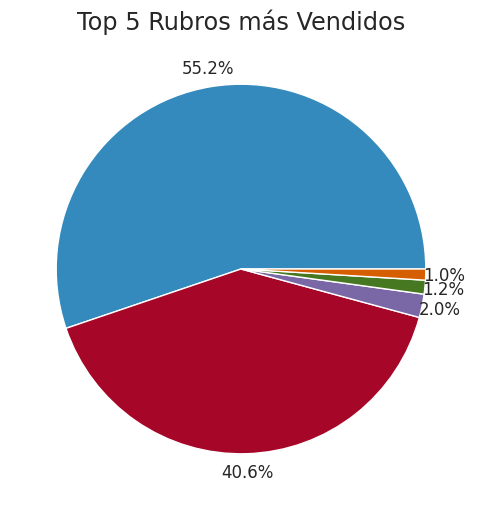

In [304]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
xp = df_rubro.index
yp = df_rubro['Cant'].nlargest(n=5)
ax.pie(yp, autopct='%1.1f%%', wedgeprops = {"linewidth": 1, "edgecolor": "white"},  pctdistance=1.1, labeldistance= 0.8)
ax.set_title('Top 5 Rubros más Vendidos')

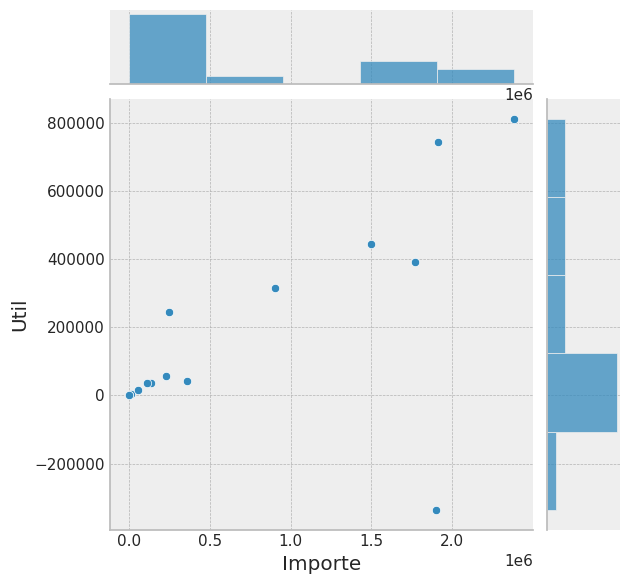

In [305]:
sns.jointplot(data = df_rubro, x = "Importe", y = "Util")

<Axes: xlabel='Cant', ylabel='Importe'>

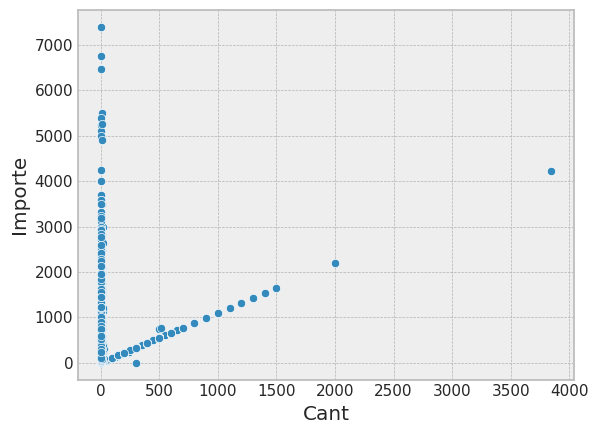

In [315]:
sns.scatterplot(data=df, x="Cant", y="Importe")

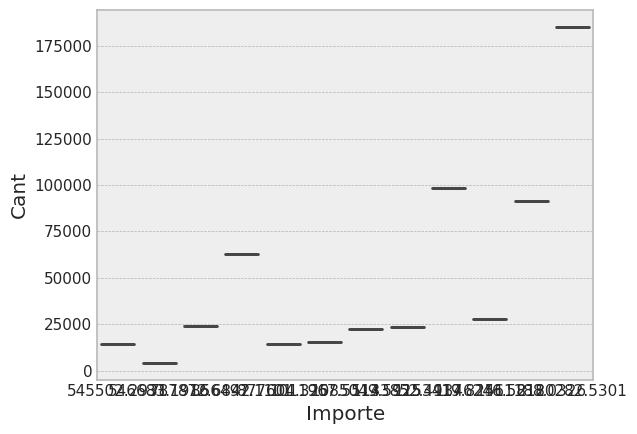

In [319]:
ax = sns.boxplot(x="Importe", y="Cant", data=venta_mes)